In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%load_ext rpy2.ipython

In [2]:
sns.set_style('white')

In [3]:
def entropy(p):
    p = np.array(p)
    p = p[p > 0]
    return (- p * np.log(p)).sum() / np.log(2)

In [4]:
@np.vectorize
def entropy_for_two(p):
    return entropy([p, 1-p])

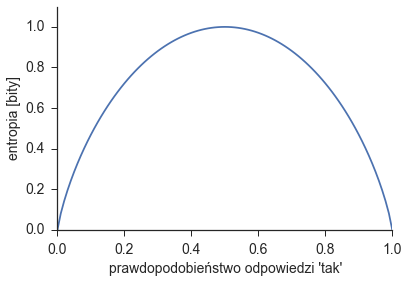

In [5]:
sns.set_style('ticks')
X = np.arange(0, 1.001, 0.01)
plt.plot(X, entropy_for_two(X))
plt.ylim(0, 1.1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("")
plt.ylabel("entropia [bity]", fontsize=14)
plt.xlabel("prawdopodobieństwo odpowiedzi 'tak'", fontsize=14)
sns.despine()
# plt.xlabel(u"Prawdopodobieństwo wyrzucenia orła")
# plt.ylabel(u"Entropia w bitach")
plt.savefig("entropia2.svg")

In [6]:
litery = pd.read_csv("litery_pl.csv", index_col=0)

In [7]:
litery.sum()

procent    100.01
dtype: float64

In [8]:
len(litery)

35

In [9]:
np.log2(len(litery))

5.1292830169449664

In [10]:
entropy(litery['procent']/100)

4.5589094470975358

In [11]:
2**(entropy(litery['procent']/100))

23.570483490139669

In [12]:
litery['zdziwienie'] = -np.log2(litery['procent']/100)

In [13]:
litery

,procent,zdziwienie
litera,,
a,8.91,3.488431
w,4.65,4.426625
p,3.13,4.997694
g,1.42,6.137965
ć,0.40,7.965784
i,8.21,3.606474
s,4.32,4.532825
m,2.80,5.158429
ę,1.11,6.493297


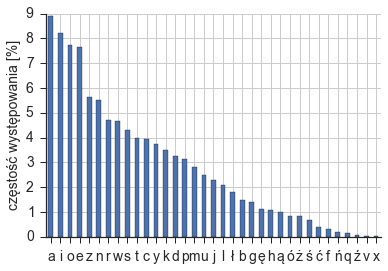

In [14]:
sns.set_style('ticks')
litery.sort('procent', ascending=False)['procent'].plot(kind='bar')
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("")
plt.ylabel("częstość występowania [%]", fontsize=14)
sns.despine()
plt.savefig("litery.svg")

In [15]:
list("aeinorswz")

['a', 'e', 'i', 'n', 'o', 'r', 's', 'w', 'z']

In [16]:
litery.loc[list("aeinorswz"), 'scrabble'] = 1
litery.loc[list("cdklmpty"), 'scrabble'] = 2
litery.loc[list("bghjłu"), 'scrabble'] = 3
litery.loc[list("ąęfóśż"), 'scrabble'] = 5
litery.loc["ć", 'scrabble'] = 6
litery.loc["ń", 'scrabble'] = 7
litery.loc["ź", 'scrabble'] = 9

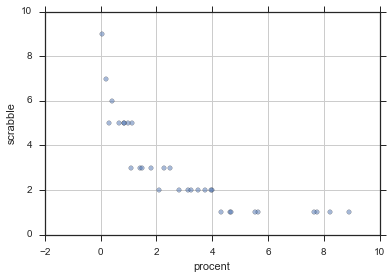

In [17]:
litery.plot(kind='scatter', x='procent', y='scrabble', alpha=0.5);

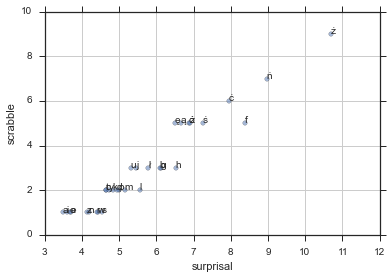

In [18]:
litery.plot(kind='scatter', x='zdziwienie', y='scrabble', alpha=0.5)
for k, v in litery.iterrows():
    if pd.notnull(v['scrabble']):
        plt.text(v['zdziwienie'], v['scrabble'], k)
plt.xlabel(r"surprisal")

In [19]:
litery_r = litery.sort('procent', ascending=False)
litery_r['litera'] = litery_r.index
litery_r['surprisal'] = litery_r.index

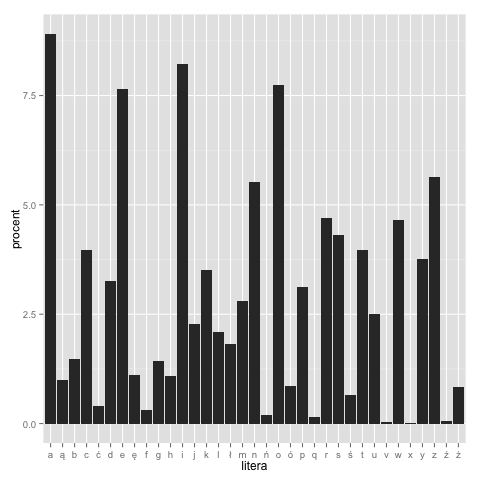

In [20]:
%%R -i litery_r
library(ggplot2)
ggplot(litery_r, aes(x=litera, y=procent)) + geom_bar(stat="identity")

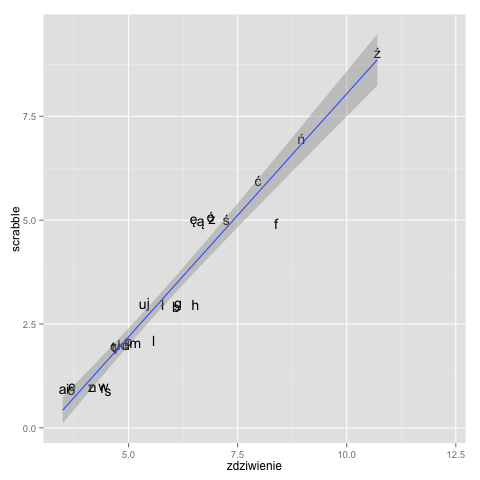

In [21]:
%%R -i litery_r
library(ggplot2)
ggplot(litery_r, aes(x=zdziwienie, y=scrabble, label=litera)) +
  geom_text(position = position_jitter(height = .1)) +  # position = "jitter"
  stat_smooth(method = "lm")